In [2]:
import librosa
import numpy as np
import os
import glob
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def features(path):
  y, sr=librosa.load(path,sr=16000)
  mfccs=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
  mfccs_mean=np.mean(mfccs,axis=1)
  cen=np.mean(librosa.feature.spectral_centroid(y=y,sr=sr))
  band=np.mean(librosa.feature.spectral_bandwidth(y=y,sr=sr))
  rolloff=np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr))
  contrast=np.mean(librosa.feature.spectral_contrast(y=y,sr=sr))
  chroma=np.mean(librosa.feature.chroma_stft(y=y,sr=sr))
  tonnetz=np.mean(librosa.feature.tonnetz(y=y,sr=sr))
  zero=np.mean(librosa.feature.zero_crossing_rate(y))
  rmse=np.mean(librosa.feature.rms(y=y))
  f=np.hstack([mfccs_mean,cen,band,rolloff,contrast,chroma,tonnetz,zero,rmse])
  return f

In [ ]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

def ex(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(extract_path)
        print(os.listdir(extract_path))

ex("/content/drive/MyDrive/real.zip", "/content/")
ex("/content/drive/MyDrive/fake.zip", "/content/")


In [ ]:
real_files=glob.glob("/content/real/*.wav")
fake_files=glob.glob("/content/fake/*.wav")
X,y=[],[]
for file in real_files:
  X.append(features(file))
  y.append(1)
for file in fake_files:
  X.append(features(file))
  y.append(0)
X

In [ ]:
len(X)

22859

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.DataFrame(X)
df['label'] = y

# Save to Drive
csv_path = "/content/drive/MyDrive/audio_features_firstone.csv"
df.to_csv(csv_path, index=False)
print(f"Features saved to: {csv_path}")

In [4]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/audio_features_firstone.csv"

df = pd.read_csv(csv_path)
X = df.drop('label', axis=1).values
y = df['label'].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of X: (22859, 48)
Shape of y: (22859,)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [6]:
df_eda = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df_eda['Label'] = y

print("Data Overview:")
print(df_eda.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22859 entries, 0 to 22858
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   22859 non-null  float64
 1   Feature_1   22859 non-null  float64
 2   Feature_2   22859 non-null  float64
 3   Feature_3   22859 non-null  float64
 4   Feature_4   22859 non-null  float64
 5   Feature_5   22859 non-null  float64
 6   Feature_6   22859 non-null  float64
 7   Feature_7   22859 non-null  float64
 8   Feature_8   22859 non-null  float64
 9   Feature_9   22859 non-null  float64
 10  Feature_10  22859 non-null  float64
 11  Feature_11  22859 non-null  float64
 12  Feature_12  22859 non-null  float64
 13  Feature_13  22859 non-null  float64
 14  Feature_14  22859 non-null  float64
 15  Feature_15  22859 non-null  float64
 16  Feature_16  22859 non-null  float64
 17  Feature_17  22859 non-null  float64
 18  Feature_18  22859 non-null  float64
 19  Feature_19

In [7]:
print("\nSummary Statistics:")
print(df_eda.describe())



Summary Statistics:
          Feature_0     Feature_1     Feature_2     Feature_3     Feature_4  \
count  22859.000000  22859.000000  22859.000000  22859.000000  22859.000000   
mean    -175.587713    117.585694     -3.858110     33.566969      0.935548   
std       50.601916     13.728220     15.595052      9.937561      7.692443   
min     -357.377747     62.816509    -57.130112    -11.283856    -35.123081   
25%     -211.238258    108.854568    -10.432673     26.830346     -3.917903   
50%     -175.814529    117.331657     -1.692014     34.422134      0.859252   
75%     -142.021774    125.705265      5.891493     40.659285      5.894227   
max       -2.584084    195.997131     40.794891     69.485664     27.461651   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  22859.000000  22859.000000  22859.000000  22859.000000  22859.000000   
mean      14.064101     -2.797774     -3.417642      1.702243      1.410140   
std        6.360787      5.810

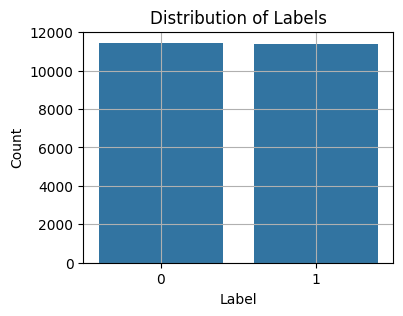

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x='Label', data=df_eda)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()


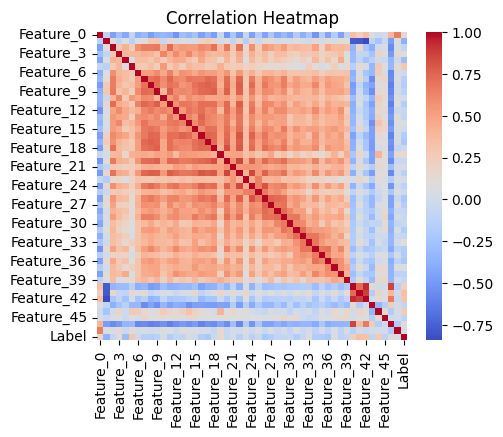

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(df_eda.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


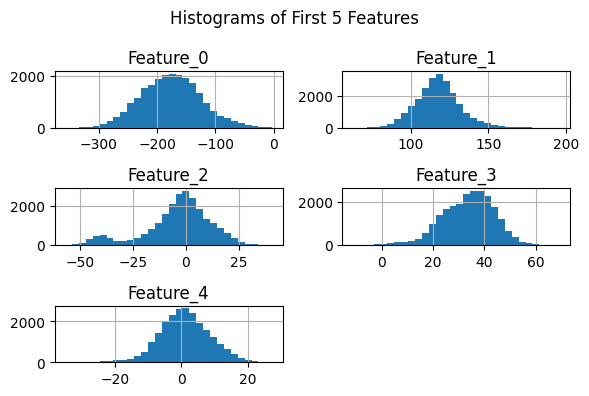

In [15]:
df_eda.iloc[:, :5].hist(figsize=(6,4), bins=30)
plt.suptitle("Histograms of First 5 Features")
plt.tight_layout()
plt.show()

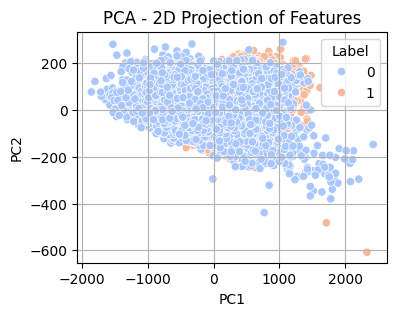

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = y
plt.figure(figsize=(4,3))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_pca, palette='coolwarm')
plt.title("PCA - 2D Projection of Features")
plt.grid(True)
plt.show()

In [20]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = y_pred

    print(f"\nEvaluation Metrics for {model_name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
#RandomForest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")


Evaluation Metrics for Random Forest:
Confusion Matrix:
 [[2264   44]
 [  40 2224]]
Accuracy: 0.9816272965879265
Precision: 0.9805996472663139
Recall: 0.9823321554770318
F1 Score: 0.9814651368049426


In [33]:
# K-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")



Evaluation Metrics for K-Nearest Neighbors:
Confusion Matrix:
 [[2252   56]
 [   4 2260]]
Accuracy: 0.9868766404199475
Precision: 0.9758203799654577
Recall: 0.9982332155477032
F1 Score: 0.9868995633187773


In [34]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "Support Vector Machine")


Evaluation Metrics for Support Vector Machine:
Confusion Matrix:
 [[2299    9]
 [   6 2258]]
Accuracy: 0.9967191601049868
Precision: 0.9960299955888839
Recall: 0.9973498233215548
F1 Score: 0.996689472522622


In [35]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test, "Naive Bayes")


Evaluation Metrics for Naive Bayes:
Confusion Matrix:
 [[1998  310]
 [1193 1071]]
Accuracy: 0.6712598425196851
Precision: 0.775524981897176
Recall: 0.4730565371024735
F1 Score: 0.5876543209876544


In [36]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")


Evaluation Metrics for Decision Tree:
Confusion Matrix:
 [[2119  189]
 [ 166 2098]]
Accuracy: 0.9223534558180227
Precision: 0.9173589855706166
Recall: 0.926678445229682
F1 Score: 0.9219951658976049


In [37]:
# ANN
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32").flatten()
print("\nEvaluation Metrics for ANN:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluation Metrics for ANN:
Confusion Matrix:
 [[2301    7]
 [   8 2256]]
Accuracy: 0.9967191601049868
Precision: 0.9969067609368095
Recall: 0.9964664310954063
F1 Score: 0.9966865473823724
